In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

%matplotlib inline

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Шпаргалки/dataset.csv")
df.head(3)

,id,Количество.комнат,Студия,Общая.площадь,Этаж,Этажей.в.доме,Парковка,Цена,Без.ремонта,Дизайнерский,...,Остановка.1000,Одежда..1000,Супер3кет.1000,Кинотеатр.1000,Кафе.1000,АЗС.1000,Детский.сад.1000,Бар.1000,Банк.1000,Аптека.1000
0,1,1,0,35.1,7,9,1,1946322.0,0,0,...,12,13,10,0,5,1,31,13,10,26
1,2,5,0,95.2,1,10,1,5000000.0,0,0,...,12,13,10,0,5,1,31,13,10,26
2,3,1,0,34.0,1,5,0,1870000.0,0,0,...,12,13,9,0,4,1,26,13,11,28


In [ ]:
df.columns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Шпаргалки/dataset.csv")
df = df.drop("id", axis=1)

min_max_scaler_x = preprocessing.MinMaxScaler()
min_max_scaler_y = preprocessing.MinMaxScaler()

df_y = df[["Цена"]]
df_x = df.drop("Цена", axis=1)

df_scaled_x = min_max_scaler_x.fit_transform(df_x)
df_scaled_y = min_max_scaler_y.fit_transform(df_y)

![image.png](attachment:image.png)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_scaled_x,
                                                    df_scaled_y[:, 0],
                                                    test_size=0.2)

Базовая модель - линейная регрессия

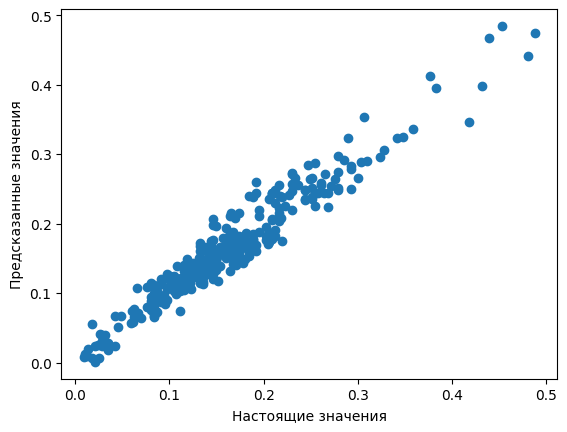

Корень из среднеквадратичной ошибки: 0.021328323433005936


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Настоящие значения")
plt.ylabel("Предсказанные значения")
plt.show()

print('Корень из среднеквадратичной ошибки:',
      np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

### Добавим нелинейность

![image.png](attachment:image.png)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

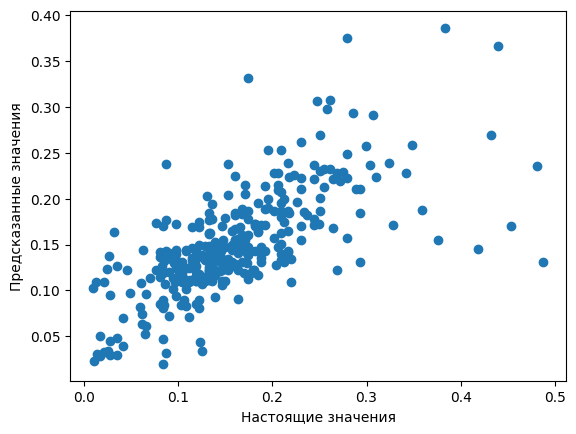

Корень из среднеквадратичной ошибки: 0.05958789716316182


In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Настоящие значения")
plt.ylabel("Предсказанные значения")
plt.show()

print('Корень из среднеквадратичной ошибки:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
?KNeighborsRegressor

In [ ]:
errors = []

for i in range(1, 20):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    e = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    errors.append(e)

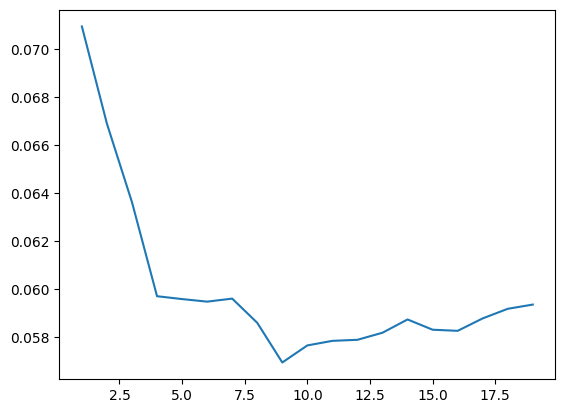

In [ ]:
plt.plot([i for i in range(1, 20)], errors)

In [ ]:
knn = KNeighborsRegressor(n_neighbors=2)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

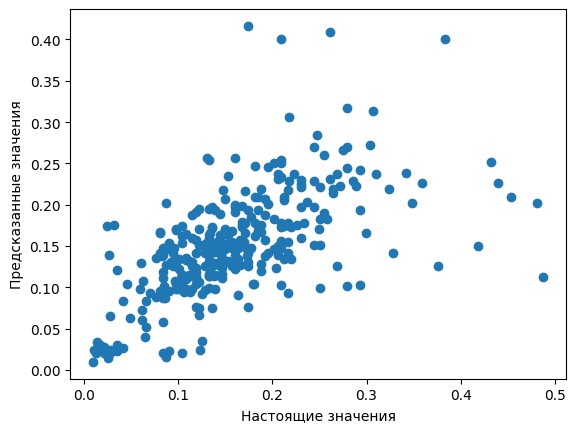

Корень из среднеквадратичной ошибки: 0.06688311210313516


In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Настоящие значения")
plt.ylabel("Предсказанные значения")
plt.show()

print('Корень из среднеквадратичной ошибки:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Если нужно подобрать гипер-параметры модели

![image.png](attachment:image.png)

Перекрестная проверка

![image.png](attachment:image.png)

![image.png](attachment:image.png)

In [ ]:
?KNeighborsRegressor

In [ ]:
n_neighbors = list(range(1, 10))
p = [1, 2]
weights = ["uniform", "distance"]

hyperparameters = dict(n_neighbors=n_neighbors, weights=weights, p=p)
print(hyperparameters)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'weights': ['uniform', 'distance'], 'p': [1, 2]}


In [ ]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsRegressor()
search = GridSearchCV(knn, hyperparameters, cv=3)

In [ ]:
best_model = search.fit(X_train, y_train)

In [ ]:
best_model.best_estimator_

KNeighborsRegressor(p=1, weights='distance')

In [ ]:
search = GridSearchCV(knn, hyperparameters, cv=10, verbose=2)
best_model = search.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=1, p=1, we

In [ ]:
knn = best_model.best_estimator_

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

e = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
e

0.05570558285065759

### Дерево решений

![image.png](attachment:image.png)

![image.png](attachment:image.png)

## Случайный лес

![image.png](attachment:image.png)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
n_estimators = [int(x) for x in np.linspace(start=50, stop=400, num=3)]

max_depth = [int(x) for x in np.linspace(10, 110, num=2)]

max_depth.append(None)
min_samples_leaf = [1, 4]

param_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf
              }
param_grid

In [ ]:
?RandomForestRegressor

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf_random = GridSearchCV(estimator=rf,
                         param_grid=param_grid,
                         cv=3,
                         verbose=2)

rf_random.fit(X_train, y_train)

In [ ]:
rf = rf_random.best_estimator_

In [ ]:
rf

In [ ]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

e = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
e

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Настоящие значения")
plt.ylabel("Предсказанные значения")
plt.show()

print('Корень из среднеквадратичной ошибки:',
      np.sqrt(metrics.mean_squared_error(y_test, y_pred)))